# Robustness Analysis: EXPERIMENTATION NOTEBOOK

In this notebook we experiment with the different types of simulations, with the purpose of:
- debugging
- time-tracking
- feature exploration 

The actual simulations to run are the .py files contained in this folder.
These are to run from the command line.

## LOG

#### Decide:
- Food-groups: do we want to treat them as special entities?
- Do we want to use multiple graphs (multiple preparations and instances) and eventually include in setup section?
- compute the standard deviation from the mean with perturbations (what does it mean?)
- write threatened species strategy

#### PRIO1:
- track nodes with size of graph. (save_nodes: bool = False)

#### PRIO2:
- experiment with different metrics
- test and comment all classes

#### PRIO3:
- draw pipeline of program
- rewrite class diagram
- write node removal algorithm report

#### Done:
- create results folder and write the .csv files in it
- when removing bucket point out probability issue
- store size of graph in metric evolution
- flatten results for averaging them
- write procedure to flatten the metrics for secondary removal 
- compute median of in_degree and use it as default  
- sequential strategy

## Setup

In [1]:
# for jupyter notebook imports
import sys
sys.path.append('..')

In [2]:
from robustness_analysis.graph import Graph
from robustness_analysis.metaweb import Metaweb, MetawebProcessor
import robustness_analysis.constants as constants
from robustness_analysis.attack_strategy import Random, Sequential, ThreatenedHabitats, ThreatenedSpecies
from robustness_analysis.metaweb import ProcessingStrategy
from robustness_analysis.simulation import Simulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'metric_calculator'

In [3]:
def plot_results(results: dict, attack_strategy: str) -> None:

    metric_names = list(results.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(metric_names)))

    num_rows = len(metric_names)

    fig = plt.figure(figsize=(12, 9 * num_rows), dpi=300) 

    for i, metric_name in enumerate(metric_names):
        ax = fig.add_subplot(num_rows, 1, i+1)  
        ax.plot(results[metric_name], color=colors[i], linestyle='-', linewidth=2)
        
        ax.set_ylabel(metric_name.replace("_", " ").title(), fontsize=14)
        ax.set_title(f'{metric_name.replace("_", " ").title()} Robustness Trend', fontsize=16)
        
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.spines['left'].set_linewidth(0.5)

    fig.suptitle(f'Attack Strategy: \'{attack_strategy}\'', fontsize=18, y=1.05)
    plt.tight_layout()

    plt.show()

In [4]:
# prepare edges 
metaweb_processor = MetawebProcessor(constants.ALL_SPECIES_AND_FOOD_GROUPS, constants.SPECIES_FOR_RANDOMIZED_LINKS)
metaweb = Metaweb(constants.FOODWEB_02, usecols=[constants.SOURCE_COL, constants.TARGET_COL])
metaweb.setup(ProcessingStrategy.USE_AS_IS, metaweb_processor)
edge_df = metaweb.get_edges()

## Simulation 1: NULL MODEL

In [5]:
# instanciate graph and attach habitat information to nodes
attack_strategy = Random()
graph = Graph(attack_strategy, edge_df, source=constants.SOURCE_COL, target=constants.TARGET_COL)
graph.setup_attack_strategy()

In [6]:
simulation = Simulation(graph, 2)
simulation.run()

KeyboardInterrupt: 

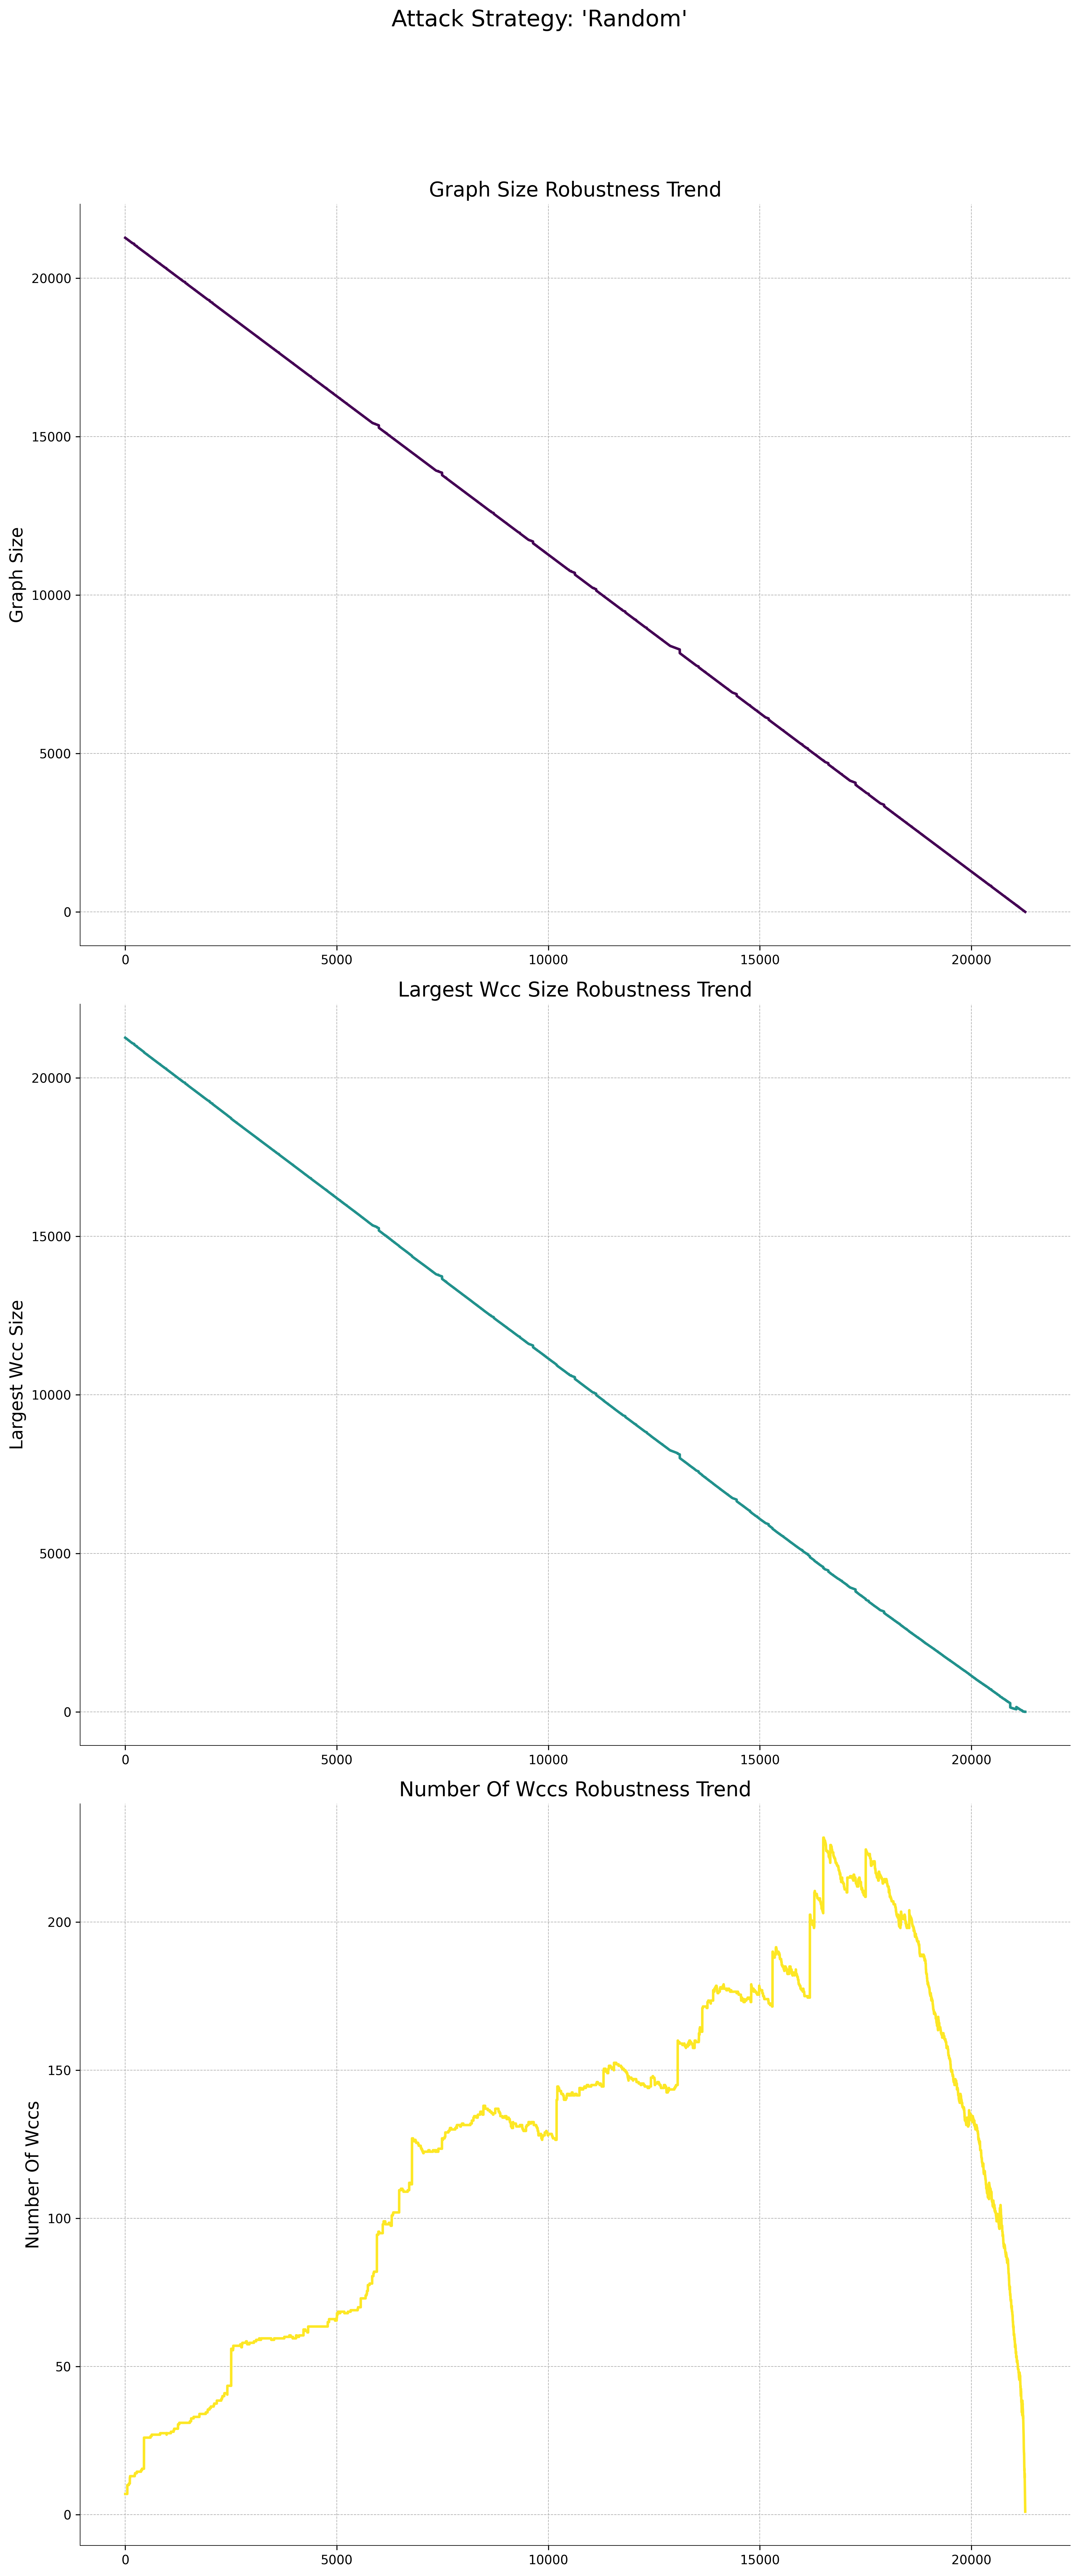

In [ ]:
results = simulation.get_results()
plot_results(results, "Random")

## Simulation 2: SEQUENTIAL

In [7]:
# instanciate graph and attach habitat information to nodes
attack_strategy = Sequential(Sequential.SortBy.DEGREE)
graph = Graph(attack_strategy, edge_df, source=constants.SOURCE_COL, target=constants.TARGET_COL)
graph.setup_attack_strategy()

['Corvus corone', 'Corvus corax', 'Corvus frugilegus', 'Emberiza schoeniclus', 'Pica pica', 'Garrulus glandarius', 'Turdus philomelos', 'Pyrrhocorax graculus', 'Acanthis flammea', 'Passer domesticus', 'Oriolus oriolus', 'Prunella modularis', 'Corvus monedula', 'Fulica atra', 'Sturnus vulgaris', 'Coturnix coturnix', 'Pyrrhocorax pyrrhocorax', 'Fringilla coelebs', 'Cyanistes caeruleus', 'Turdus merula', 'Anas platyrhynchos', 'Emberiza citrinella', 'Turdus pilaris', 'Alauda arvensis', 'Lullula arborea', 'Turdus viscivorus', 'Erithacus rubecula', 'Passer montanus', 'Emberiza cirlus', 'Turdus torquatus', 'Emberiza calandra', 'Emberiza cia', 'Parus major', 'Passer italiae', 'Lophophanes cristatus', 'Periparus ater', 'Poecile palustris', 'Poecile montanus', 'Sitta europaea', 'Montifringilla nivalis', 'Pyrrhula pyrrhula', 'Chloris chloris', 'Linaria cannabina', 'Tetrao urogallus', 'Carduelis citrinella', 'Serinus serinus', 'Carpodacus erythrinus', 'Alectoris graeca', 'Cygnus olor', 'Columba pa

In [8]:
simulation = Simulation(graph, 1)  # k = 1 if the nodes are sorted sequentially
simulation.run()

Id: 0 starting simulation ...


KeyboardInterrupt: 

In [ ]:
results = simulation.get_results()
plot_results(results, "Sequential")

## Simulation 3: THREATENED HABITATS

In [ ]:
# instanciate graph and attach habitat information to nodes
threatened_habitats = ["Grassland", "Forest"]
attack_strategy = ThreatenedHabitats(threatened_habitats)
graph = Graph(attack_strategy, edge_df, source=constants.SOURCE_COL, target=constants.TARGET_COL)
graph.setup_attack_strategy()

In [ ]:
simulation = Simulation(graph, 10)
simulation.run()

In [ ]:
results = simulation.get_results()
plot_results(results, "Threatened Habitats")

## Simulation 4: THREATENED SPECIES

In [ ]:
# TODO: missing implementation of bucket creation

In [ ]:
# instanciate graph and attach habitat information to nodes
threatened_species = [""]
attack_strategy = ThreatenedSpecies(threatened_species)
graph = Graph(attack_strategy, edge_df, source=constants.SOURCE_COL, target=constants.TARGET_COL)
graph.setup_attack_strategy()

In [ ]:
simulation = Simulation(graph, 10)
simulation.run()

In [ ]:
results = simulation.get_results()
plot_results(results, "Threatened Species")

In [ ]:
import cProfile
import pstats
import sys
sys.path.append('../')

from graph import Graph
from metaweb import Metaweb, MetawebProcessor
from attack_strategy import Sequential
from metaweb import ProcessingStrategy
from simulation import Simulation
import constants
from file_exporter import export


if __name__ == "__main__":
    with cProfile.Profile() as profile:
        # setup edges 
        metaweb_processor = MetawebProcessor(constants.ALL_SPECIES_AND_FOOD_GROUPS, constants.SPECIES_FOR_RANDOMIZED_LINKS)
        metaweb = Metaweb(constants.FOODWEB_02, usecols=[constants.SOURCE_COL, constants.TARGET_COL])
        metaweb.setup(ProcessingStrategy.USE_AS_IS, metaweb_processor)
        edge_df = metaweb.get_edges()

        # setup graph
        attack_strategy = Sequential(Sequential.SortBy.DEGREE)
        graph = Graph(attack_strategy, edge_df, source=constants.SOURCE_COL, target=constants.TARGET_COL)
        graph.setup_attack_strategy()

        # run simulation
        simulation = Simulation(graph, 2)
        simulation.run()

        simulation_results = simulation.get_results()

        export(simulation_results)

    profiling_results = pstats.Stats(profile)
    profiling_results.sort_stats(pstats.SortKey.TIME)
    profiling_results.print_stats()